In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris, load_breast_cancer
import os
import imageio.v2 as imageio
from sklearn.model_selection import train_test_split


In the above code, we first import the necessary libraries: `numpy` for numerical computations, `matplotlib.pyplot` for data visualization, and `make_classification`, `load_iris`, and `load_breast_cancer` from `sklearn.datasets` to generate and load datasets.

Next, we generate a random dataset using the `make_classification` function from `sklearn.datasets`. We set the seed for reproducibility and create 100 samples with 2 informative features and no redundant features.

We also load two built-in datasets, namely the Iris dataset (`iris`) and the Breast Cancer dataset (`breast_cancer`), using the respective `load` functions from `sklearn.datasets`.

In [2]:
# Generating a random dataset
np.random.seed(42)  # Set the random seed for reproducibility
X_random, y_random = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                                         n_clusters_per_class=1)
# make_classification generates a random classification dataset
# n_samples: Number of samples (instances) in the dataset
# n_features: Number of features (input variables) in the dataset
# n_informative: Number of informative features
# n_redundant: Number of redundant features
# n_clusters_per_class: Number of clusters per class (to control separation)


In [3]:
# Loading built-in datasets
iris = load_iris()  # Load the Iris dataset
breast_cancer = load_breast_cancer()  # Load the Breast Cancer dataset

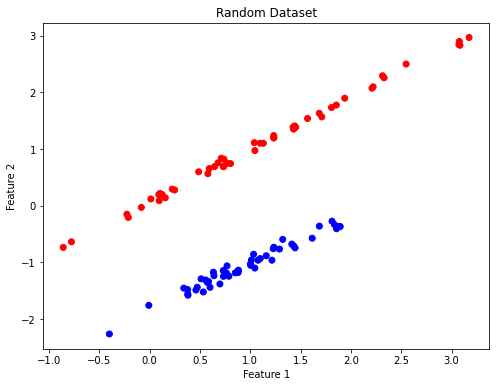

In [4]:
# Plotting the random dataset
plt.figure(figsize=(8, 6))  # Create a new figure with the specified size
plt.scatter(X_random[:, 0], X_random[:, 1], c=y_random, cmap='bwr')
# Scatter plot the random dataset
# X_random[:, 0]: First feature (column) of the random dataset
# X_random[:, 1]: Second feature (column) of the random dataset
# c=y_random: Color the data points based on the target labels
# cmap='bwr': Use the blue-white-red colormap for coloring
plt.title('Random Dataset')  # Set the title of the plot
plt.xlabel('Feature 1')  # Set the x-axis label
plt.ylabel('Feature 2')  # Set the y-axis label
plt.show()  # Display the plot


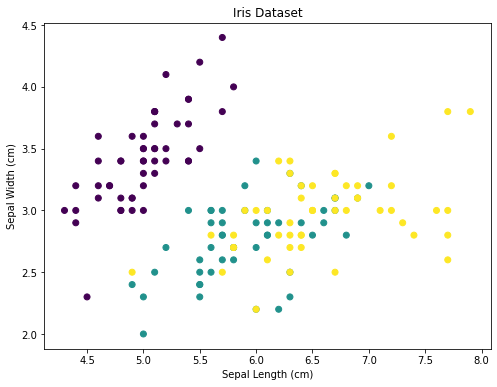

In [5]:
# Plotting the Iris dataset
plt.figure(figsize=(8, 6))  # Create a new figure with the specified size
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='viridis')
# Scatter plot the Iris dataset
# iris.data[:, 0]: First feature (column) of the Iris dataset
# iris.data[:, 1]: Second feature (column) of the Iris dataset
# c=iris.target: Color the data points based on the target labels
# cmap='viridis': Use the viridis colormap for coloring
plt.title('Iris Dataset')  # Set the title of the plot
plt.xlabel('Sepal Length (cm)')  # Set the x-axis label
plt.ylabel('Sepal Width (cm)')  # Set the y-axis label
plt.show()  # Display the plot


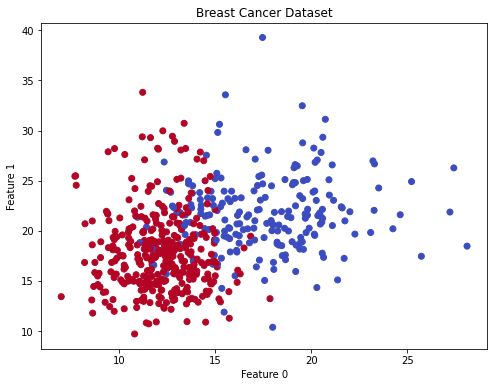

In [6]:
# Plotting the Breast Cancer dataset
plt.figure(figsize=(8, 6))  # Create a new figure with the specified size
plt.scatter(breast_cancer.data[:, 0], breast_cancer.data[:,
            1], c=breast_cancer.target, cmap='coolwarm')
# Scatter plot the Breast Cancer dataset
# breast_cancer.data[:, 0]: First feature (column) of the Breast Cancer dataset
# breast_cancer.data[:, 1]: Second feature (column) of the Breast Cancer dataset
# c=breast_cancer.target: Color the data points based on the target labels
# cmap='coolwarm': Use the coolwarm colormap for coloring
plt.title('Breast Cancer Dataset')  # Set the title of the plot
plt.xlabel('Feature 0')  # Set the x-axis label
plt.ylabel('Feature 1')  # Set the y-axis label
plt.show()  # Display the plot


In the above code, we visualize the imported datasets one by one using scatter plots. For each dataset, we create a separate figure and scatter plot using `plt.scatter`. We pass the features as the x and y coordinates, and the corresponding targets or labels for color mapping. The cmap parameter specifies the colormap to be used.

After plotting each dataset, we set the title, x-label, and y-label using `plt.title`, `plt.xlabel`, and `plt.ylabel`, respectively. Finally, we display the plot using `plt.show()`.

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
# Function to create a colored scatter plot with decision boundary
def plot_decision_boundary(X, y, model, filename):
    # Create a meshgrid to plot the decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a scatter plot with decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.title('Logistic Regression')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.savefig(filename)
    plt.close()


In [9]:
# Create a folder to store temporary images
os.makedirs('temp_images', exist_ok=True)


In [10]:
# Perform a test-train split on the random dataset
X_random_train, X_random_test, y_random_train, y_random_test = train_test_split(
    X_random, y_random, test_size=0.2, random_state=42
)


In [11]:
# Fit logistic regression on the random dataset and export fitting as GIF
lr_random = LogisticRegression(max_iter=100)
lr_random.fit(X_random_train, y_random_train)

frames_random = []
for i in range(min(lr_random.n_iter_[0], 100)):
    filename = f'temp_images/logreg_random_iteration_{i}.png'
    plot_decision_boundary(X_random_train, y_random_train, lr_random, filename)
    frames_random.append(imageio.imread(filename))

imageio.mimsave('logreg_random_fitting.gif', frames_random, duration=0.5)


In [12]:
# Perform a test-train split on the Iris dataset
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    iris.data[:, :2], iris.target, test_size=0.2, random_state=42
)


In [13]:
# Fit logistic regression on the Iris dataset and export fitting as GIF
lr_iris = LogisticRegression(max_iter=100)
lr_iris.fit(X_iris_train, y_iris_train)

frames_iris = []
for i in range(min(lr_iris.n_iter_[0], 100)):
    filename = f'temp_images/logreg_iris_iteration_{i}.png'
    plot_decision_boundary(X_iris_train, y_iris_train, lr_iris, filename)
    frames_iris.append(imageio.imread(filename))

imageio.mimsave('logreg_iris_fitting.gif', frames_iris, duration=0.5)


In [ ]:
# Perform a test-train split on the Breast Cancer dataset
X_breast_cancer_train, X_breast_cancer_test, y_breast_cancer_train, y_breast_cancer_test = train_test_split(
    breast_cancer.data[:, :2], breast_cancer.target, test_size=0.2, random_state=42
)


In [ ]:
# Fit logistic regression on the Breast Cancer dataset and export fitting as GIF
lr_breast_cancer = LogisticRegression(max_iter=100)
lr_breast_cancer.fit(X_breast_cancer_train, y_breast_cancer_train)

frames_breast_cancer = []
for i in range(min(lr_breast_cancer.n_iter_[0], 100)):
    filename = f'temp_images/logreg_breast_cancer_iteration_{i}.png'
    plot_decision_boundary(X_breast_cancer_train,
                           y_breast_cancer_train, lr_breast_cancer, filename)
    frames_breast_cancer.append(imageio.imread(filename))

imageio.mimsave('logreg_breast_cancer_fitting.gif',
                frames_breast_cancer, duration=0.5)


In [ ]:
# Remove the temporary image folder
for filename in os.listdir('temp_images'):
    file_path = os.path.join('temp_images', filename)
    os.remove(file_path)
os.rmdir('temp_images')


In [ ]:
# Display the GIFs in the notebook
from IPython.display import Image, display

display(Image('logreg_random_fitting.gif'))
display(Image('logreg_iris_fitting.gif'))
display(Image('logreg_breast_cancer_fitting.gif'))
